<a href="https://colab.research.google.com/github/MottaGit/Machine-Learning-And-Data-Science/blob/main/Pre_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [35]:
!pip install plotly --upgrade

     |████████████████████████████████| 25.3 MB 51.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Credit Data

Objetivo desde algoritmo é, ao receber a base de crédito de uma pessoa, fazer a previsão se ela vai ou não pagar o empréstimo do banco.

### Exploração dos dados

In [37]:
base_credit = pd.read_csv('/content/credit_data.csv')

In [38]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [39]:
base_credit.head(7) #exibe os 7 primeiros elementos da base de dados

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0


In [40]:
base_credit.tail(7) #exibe os 7 ultimos elementos da base de dados

,clientid,income,age,loan,default
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [41]:
base_credit.describe()  #descrições numéricas da base de dados

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [42]:
base_credit[base_credit['income'] >= 69995] #exibição com filtro

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


### Visualização dos dados

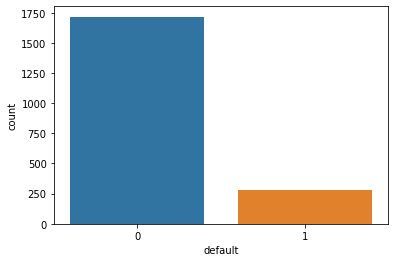

In [43]:
sns.countplot(x=base_credit['default']); #usa o método da biblioteca sns para plocar a contagem dos  valores de 'default'

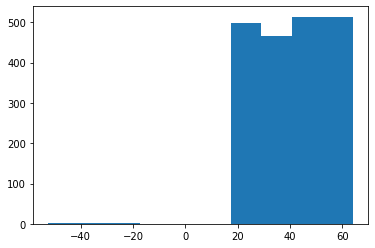

In [44]:
plt.hist(x = base_credit['age']); #usa o método da biblioteca plt para exibir o histograma das idades

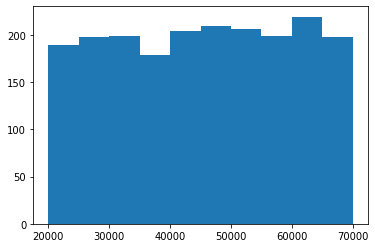

In [45]:
plt.hist(x = base_credit['income']);

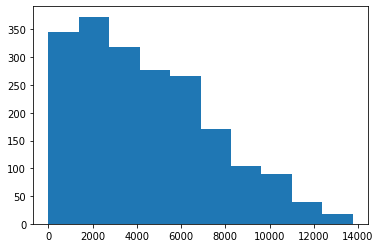

In [46]:
plt.hist(x = base_credit['loan']);

In [55]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default') #biblioteca px para exibir grafico dinamico
grafico.show()

ValueError: ignored

### Tratamento de valores inconsistentes

In [ ]:
base_credit.loc[base_credit['age']<0] #localiza os registros com idade menor que zero

In [ ]:
#apagar a coluna das idades
base_credit2 = base_credit.drop('age', axis=1)
base_credit2

In [ ]:
# Apagar somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

In [ ]:
# Preencher os valores inconsistentes manualmente

In [ ]:
# Preencher os valores inconsistentes com a média
base_credit.mean()

In [ ]:
base_credit['age'].mean()

In [ ]:
base_credit['age'][base_credit['age'] > 0].mean()

In [ ]:
base_credit.loc[base_credit['age']<0 , 'age'] = 40.92
base_credit.loc[base_credit['age']<0]

In [ ]:
base_credit.head(20)

### Tratamento de valores faltantes

In [ ]:
base_credit.isnull()  #preenche com False valores preenchidos e True valores faltantes

In [ ]:
base_credit.isnull().sum()

In [ ]:
base_credit.loc[pd.isnull(base_credit['age'])]

In [ ]:
# Preencher com a média as idades faltantes
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)  #preenche os valores faltantes com a media do atributo 'age'

In [ ]:
base_credit.loc[base_credit['clientid'] == 29]

### Divisão entre previsores e classe

In [ ]:
# X: variavel previsora Y: variavel da classe
X_credit = base_credit.iloc[:, 1:4].values
X_credit

In [ ]:
# converteu para um formato para ser processado pela biblioteca numpy
type(X_credit)

In [ ]:
Y_credit = base_credit.iloc[:, 4].values
Y_credit

### Escalonamento dos valores
Para deixar os valores no mesmo escalanomento
- Padronização: x = (x-média)/desvio
- Normalização: x = (x - xmin)/(xmax - xmin)

In [49]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -1.7264008335456944, -1.4592791099462408)

In [48]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.739380886819131, 3.0616609141708273)

In [50]:
#Biblioteca usada para escalonar os valores
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [51]:
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -1.7264008335456946, -1.459279109946241)

In [52]:
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.7393808868191312, 3.0616609141708273)

In [53]:
X_credit

array([[ 1.45393393,  1.36539444,  1.20281942],
       [-0.76217555,  0.54267377,  0.69642695],
       [ 0.83682073,  1.67418538,  1.17471147],
       ...,
       [-0.07122592, -0.97447153,  0.35420081],
       [-0.11000289,  1.73938089, -0.92675625],
       [ 1.682986  ,  1.14918992,  0.96381038]])